In [1]:
from jupyter_tikz import TexFragment
import os, sys
from IPython.display import display, HTML, Markdown, Math
import pandas as pd
import numpy as np


# To find local version of the library
sys.path.append('../src')

from pmule import PredecessorTable, ProjectGraph, pinta_tikz

In [2]:
%%capture
%mkdir -p ~/temp
%cd ~/temp

# Enunciado

Considere el proyecto cuya información se adjunta.

In [3]:

periodo_probabilidad_tau = 10

pregunta_1 = "1. Determine para cada actividad su duración optimista. ¿Influye esta duración optimista en la duración mínima del proyecto?  "
pregunta_2 = "2. Determine la duración media del proyecto y su varianza utilizando para ello la aproximación del teorema del límite central.  "
pregunta_3 = f"3. Determine la probabilidad de que el proyecto se termine antes de {periodo_probabilidad_tau} periodos.  "
pregunta_4 = "4. Planifique el proyecto teniendo en cuenta que durante las primeras tres semanas dispondrá de cuatro trabajadores y a partir de la cuarta de seis trabajadores.  "
pregunta_5 = "5. ¿Sería suficiente disponer de 4 recursos durante todo el proyecto? ¿Por qué?  "

In [4]:
display(Markdown(pregunta_1))
display(Markdown(pregunta_2))
display(Markdown(pregunta_3))
display(Markdown(pregunta_4))
display(Markdown(pregunta_5))

1. Determine para cada actividad su duración optimista. ¿Influye esta duración optimista en la duración mínima del proyecto?  

2. Determine la duración media del proyecto y su varianza utilizando para ello la aproximación del teorema del límite central.  

3. Determine la probabilidad de que el proyecto se termine antes de 10 periodos.  

4. Planifique el proyecto teniendo en cuenta que durante las primeras tres semanas dispondrá de cuatro trabajadores y a partir de la cuarta de seis trabajadores.  

5. ¿Sería suficiente disponer de 4 recursos durante todo el proyecto? ¿Por qué?  

In [5]:
datos_enunciado = pd.DataFrame([
#  nombre, anteriores, duracion, duracion_pesimista, duracion_modal, recursos
     ('A',       '---  ',     2,         2,                    2,           1  ),
     ('B',       'A    ',     2,         3,                    2,           2  ),
     ('C',       'B    ',     3,         4,                    3,           2  ),
     ('D',       'B,J  ',     4,         5,                 17/4,           1  ),
     ('E',       'F,B,J',     1,         1,                    1,           1  ),
     ('F',       'A    ',     2,         3,                    2,           2  ),
     ('G',       'C,D  ',     1,         1,                    1,           1  ),
     ('H',       'E    ',     4,         5,                    4,           1  ),
     ('I',       'B,J  ',     1,         1,                    1,           1  ),
     ('J',       'A    ',     2,         2,                    2,           1  ),
] ,columns=['activity', 'predecessor', 'duration', 'pesimistic_duration', 'modal_duration', 'resources'])
datos_enunciado.set_index('activity', inplace=True)
datos_enunciado

,predecessor,duration,pesimistic_duration,modal_duration,resources
activity,,,,,
A,---,2,2,2.00,1
B,A,2,3,2.00,2
C,B,3,4,3.00,2
D,"B,J",4,5,4.25,1
E,"F,B,J",1,1,1.00,1
F,A,2,3,2.00,2
G,"C,D",1,1,1.00,1
H,E,4,5,4.00,1
I,"B,J",1,1,1.00,1


# Solución
## Apartado 1


In [6]:
display(Markdown(pregunta_1))

1. Determine para cada actividad su duración optimista. ¿Influye esta duración optimista en la duración mínima del proyecto?  

Si entendemos la duración mínima de un proyecto como la duración media obtenida al utilizar para su cálculo las duraciones tope de las actividades, la duración optimista no causa efecto directo en esta duración. La duración máxima o Pert de una actividad, y su duración tope, son valores medios para los que a su vez podemos entender que existen valores optimístas y pesimístas de la duración. No debemos confundir el cambio en la duración de una actividad provocado de manera consciente mediante el cambio del nivel de esfuerzo aplicado, calidad de herramientas, equipos, técnicas; con la observación de que en un caso concreto la duración resulte ser aleatoriamente mayor o menor.

En lo relativo al cálculo solicitado, A partir de los datos del enunciado y de la relación $D=\frac{a+4m+b}{6}$ obtenemos la duración optimista $a=6D-b-4m$.

In [7]:
datos_proyecto = datos_enunciado.copy()
datos_proyecto['optimistic_duration'] = datos_proyecto.eval('6*duration - pesimistic_duration - 4*modal_duration')
datos_proyecto[['optimistic_duration']]

,optimistic_duration
activity,
A,2.0
B,1.0
C,2.0
D,2.0
E,1.0
F,1.0
G,1.0
H,3.0
I,1.0


## Apartado 2


In [8]:
display(Markdown(pregunta_2))

2. Determine la duración media del proyecto y su varianza utilizando para ello la aproximación del teorema del límite central.  

### Cuadro de prelaciones

Comenzamos construyendo el cuadro de prelaciones. Este cuadro nos permitirá construir los grafos Pert o Roy, si atendemos a la información de las filas; o comprobar si el grafo obtenido es correcto, atendiendo a la información de las columnas.

In [9]:
#| tbl-cap: "Cuadro de prelaciones expandido"
#| label: tbl-prelaciones
prelaciones = PredecessorTable.from_dataframe_of_strings(datos_proyecto, activity='activity', predecessor='predecessor')
prelaciones.display_immediate_linkage_matrix()

,A,B,C,D,E,F,G,H,I,J
activities,,,,,,,,,,
A,,,,,,,,,,
B,True,,,,,,,,,
C,,True,,,,,,,,
D,,True,,,,,,,,True
E,,True,,,,True,,,,True
F,True,,,,,,,,,
G,,,True,True,,,,,,
H,,,,,True,,,,,
I,,True,,,,,,,,True


### Grafo PERT con numeración de nodos

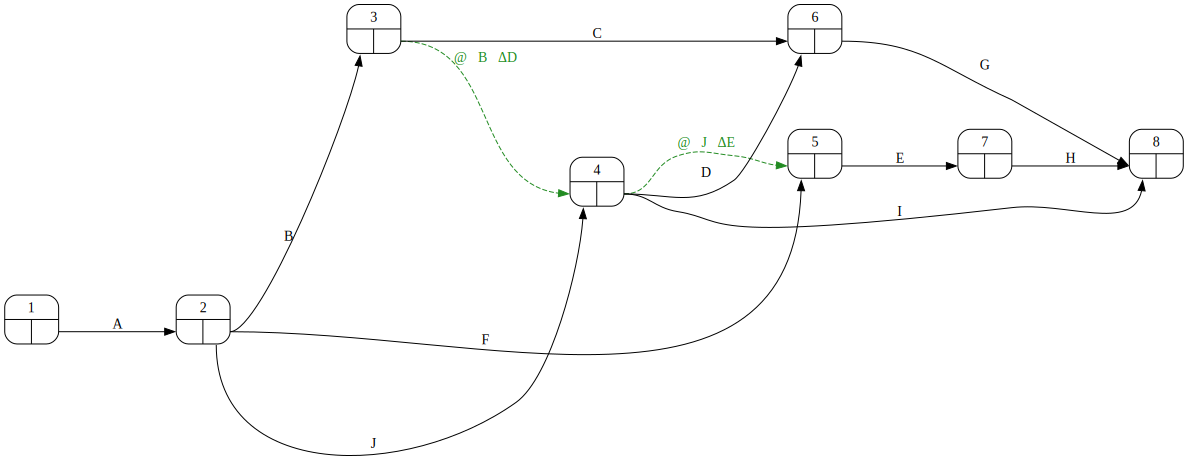

In [10]:
#| fig-cap: "Grafo Pert con indicación con indicación de los números de nodos"
#| label: fig-pertNumeracionNodos
proyecto = prelaciones.create_project()
proyecto.pert(ranksep=1.5, nodesep=0.8)

### Matriz de Zaderenko

In [11]:
#| tbl-cap: "Matriz de Zaderenko para el cálculo de tiempos tempranos y tardíos"
#| label: tbl-Zaderenko
proyecto.zaderenko(durations=datos_proyecto['duration'])

,1,2,3,4,5,6,7,8,early
1,,2.0,,,,,,,0.0
2,,,2.0,2.0,2.0,,,,2.0
3,,,,0.0,,3.0,,,4.0
4,,,,,0.0,4.0,,1.0,4.0
5,,,,,,,1.0,,4.0
6,,,,,,,,1.0,8.0
7,,,,,,,,4.0,5.0
8,,,,,,,,,9.0
late,0.0,2.0,4.0,4.0,4.0,8.0,5.0,9.0,


Los tiempos tempranos y tardios han resultado ser:

In [12]:
#| tbl-cap: "Valores de los tiempos tempranos y tardíos de los nodos"
#| label: tbl-TempranosTardios
duraciones_medias = datos_proyecto['duration']
resultados_pert = proyecto.calculate_pert(durations=duraciones_medias)
resultados_pert['nodes']

,early,late
1,0,0
2,2,2
3,4,4
4,4,4
5,4,4
6,8,8
7,5,5
8,9,9


In [13]:
duracion_media_proyecto = int(proyecto.duration(durations=duraciones_medias))

In [14]:
Markdown(f"La información del nodo final del proyecto nos informa de la duración media del proyecto: {duracion_media_proyecto} periodos")

La información del nodo final del proyecto nos informa de la duración media del proyecto: 9 periodos

### Calendario del proyecto
Las fechas de inicio y fin más tempranas y tardías de cada actividad son:

In [15]:
#| tbl-cap: "Calendario del proyecto"
#| label: tbl-calendario
calendario = proyecto.calendar(datos_proyecto['duration'])
calendario

,inicio_mas_temprano,inicio_mas_tardio,fin_mas_temprano,fin_mas_tardio,H_total,duracion
activity,,,,,,
A,0,0,2,2,0,2
B,2,2,4,4,0,2
C,4,5,7,8,1,3
D,4,4,8,8,0,4
E,4,4,5,5,0,1
F,2,2,4,4,0,2
G,8,8,9,9,0,1
H,5,5,9,9,0,4
I,4,8,5,9,4,1


## Otras representaciones alternativas
Podemos igualmente representar el cronograma del proyecto bien con un diagrama de Gantt, o un grafo Roy.

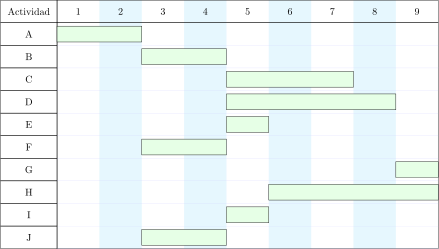

In [16]:
#| fig-cap: "Diagrama de Gantt del proyecto"
#| label: fig-gantt
gantt_df, dibujo = proyecto.gantt(datos_proyecto,
                                  duration_label='duration',
                                  tikz=True,
                                  params=dict(
                                     critical_background_color='white!90!green',
                                     regular_background_color='white!90!green',
                                     period_width=1.5,
                                 )
                            )
pinta_tikz(dibujo)

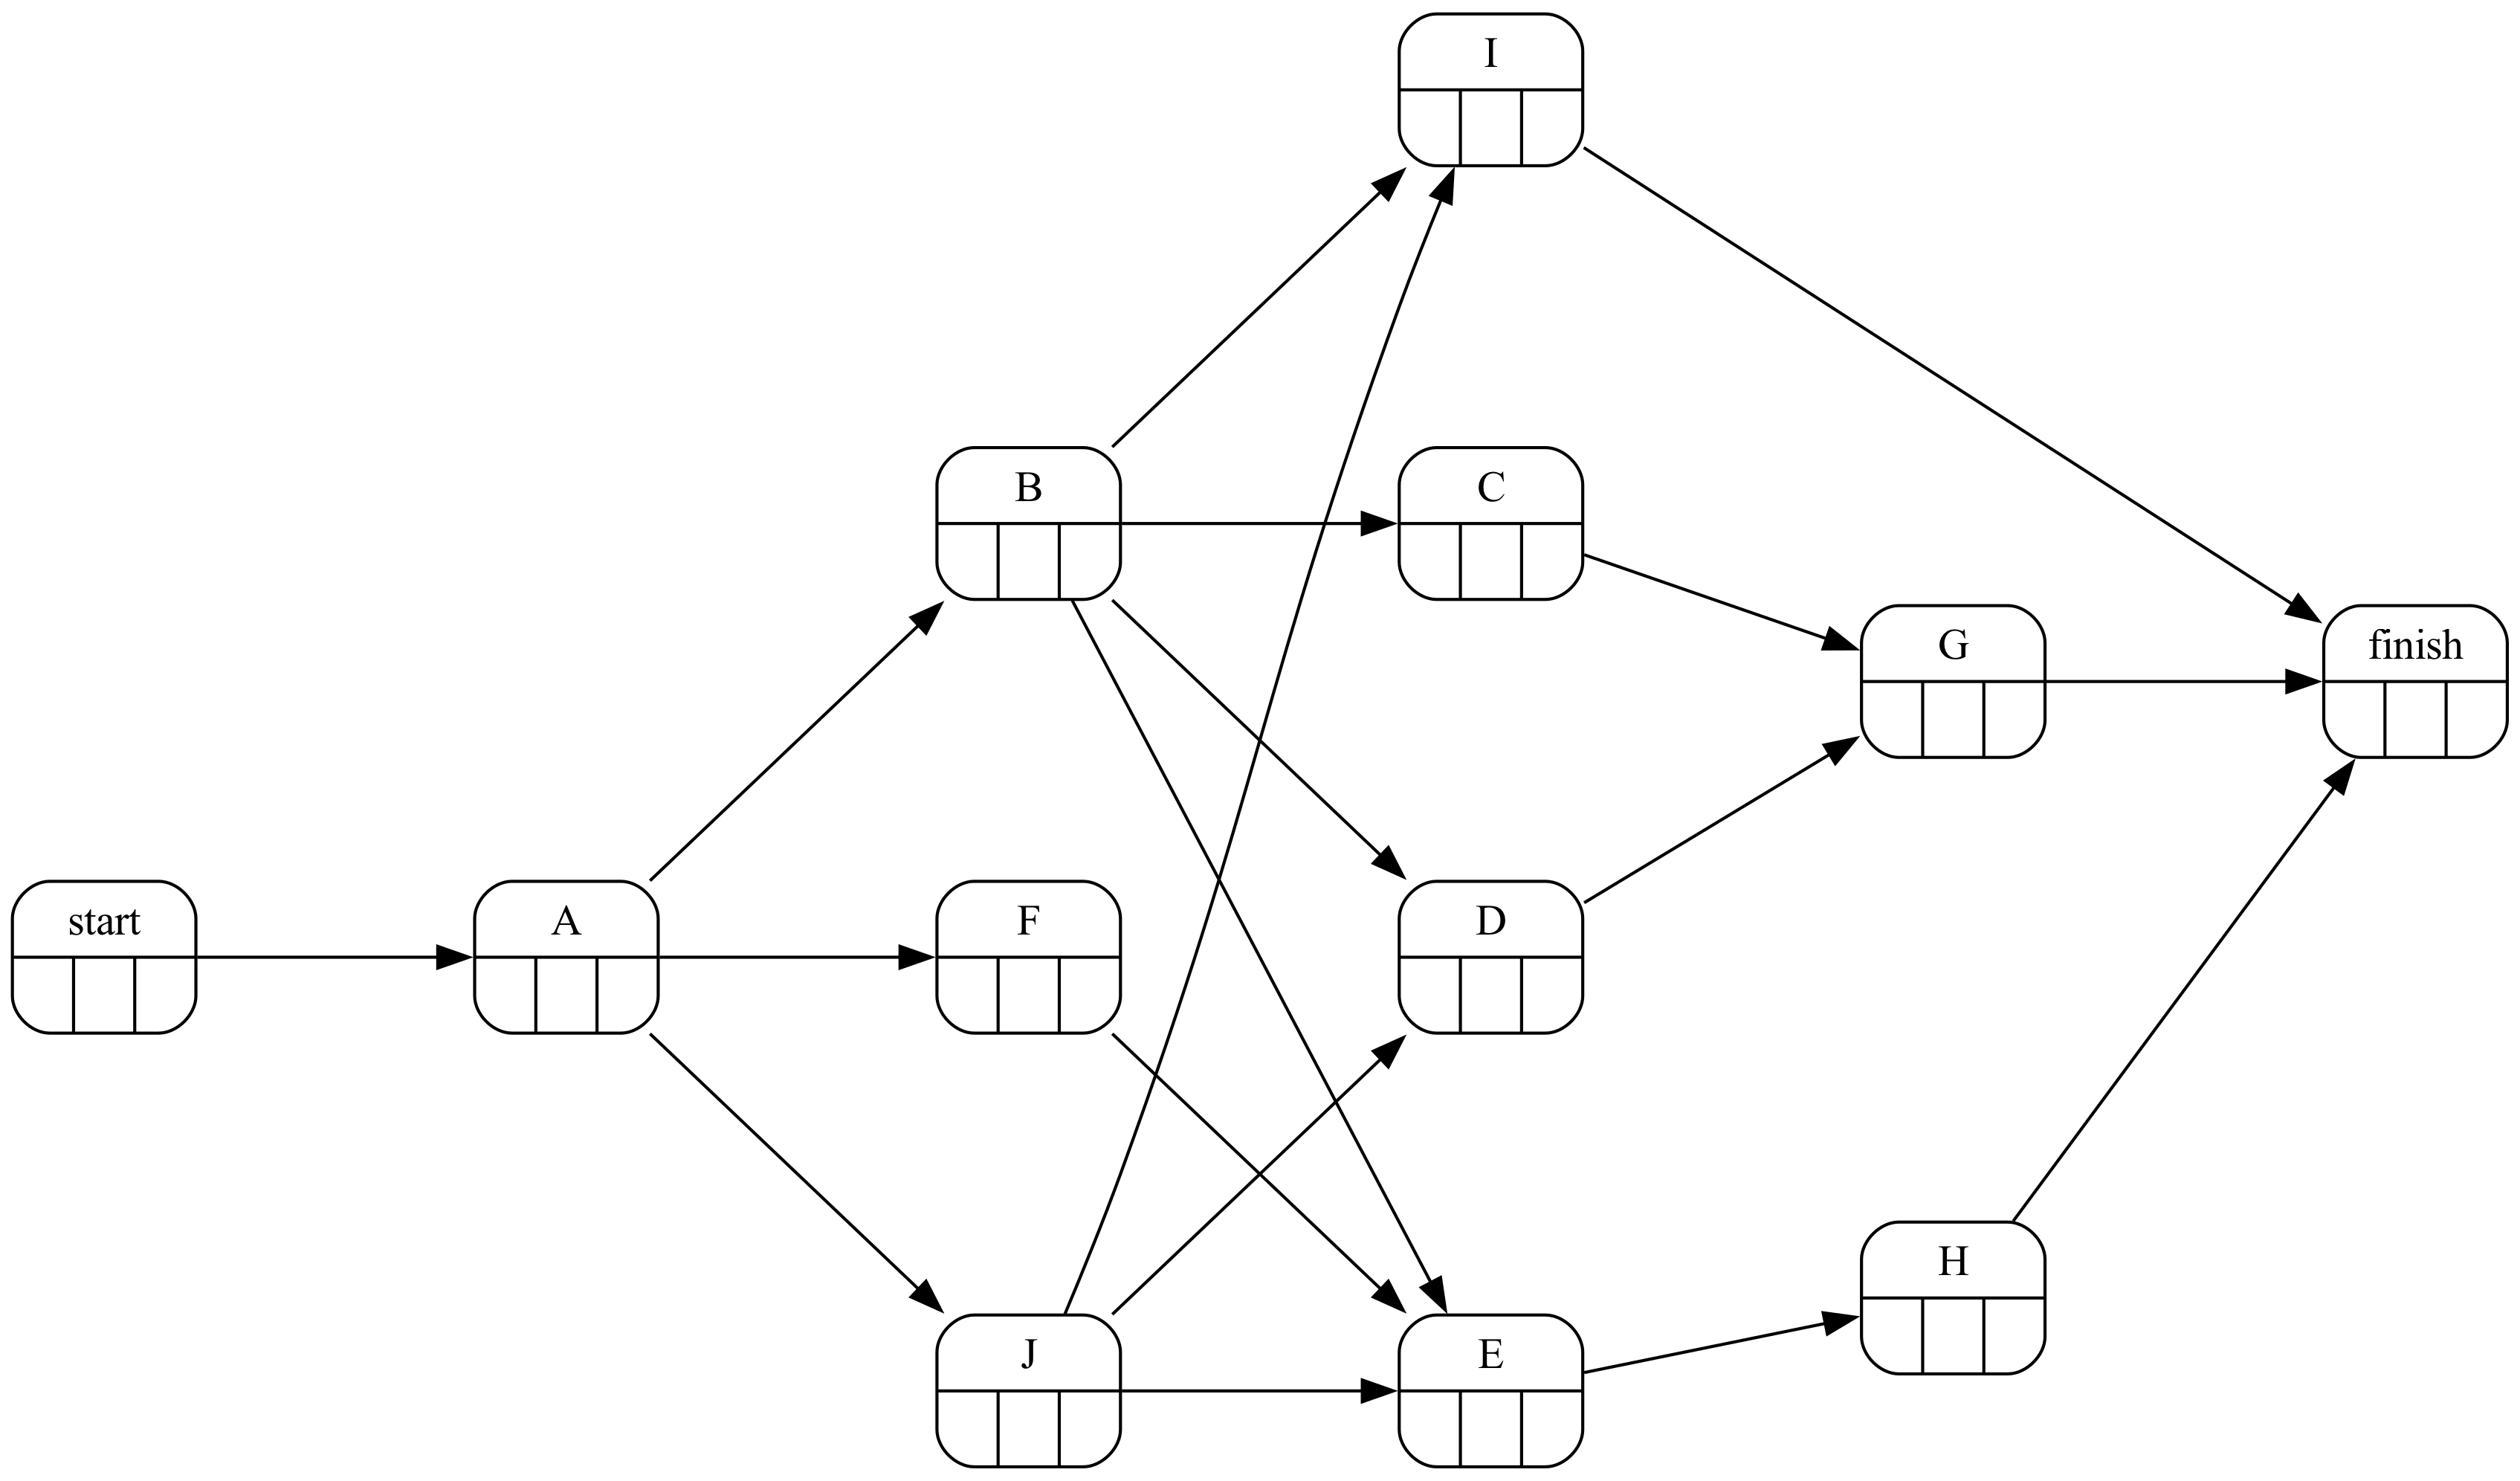

In [17]:
#| fig-cap: "Grafo Roy del proyecto"
#| label: fig-Roy
proyecto.roy(ranksep=1.25, nodesep=1.25)

### Varianza de la duración del proyecto
Para determinar la varianza de la duración del proyecto es necesario determinar la varianza de cada rama del camino crítico. Para ello nos hará falta calcular la holgura total de cada actividad. Aquellas actividades con holgura total cero formarán el camino crítico. 

#### Holguras

In [18]:
#| tbl-cap: "Valor de la holgura total de las actividades"
#| label: tbl-htotal
resultados_pert['activities'][['H_total']]

,H_total
@∇B⤑ΔD,0
@∇J⤑ΔE,0
A,0
B,0
C,1
D,0
E,0
F,0
G,0
H,0


Las actividades con holgura total igual a cero forman el camino crítico.

### Diagrama de red con indicación del camino crítico

El proyecto dado puede ser representado utilizando distintas técnicas. A continuación se muestra el grafo Pert del mismo.

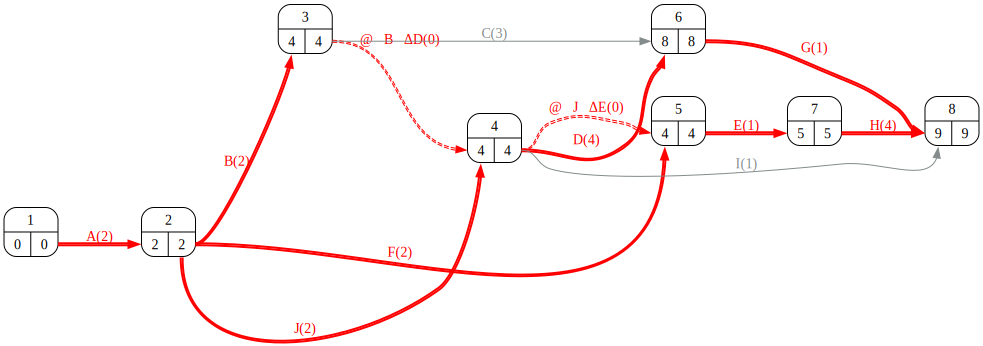

In [19]:
#| fig-cap: "Grafo Pert con indicación del camino crítico"
#| label: fig-pertrutasCriticas
proyecto.pert(durations=duraciones_medias, ranksep=0.8)

Las rutas del camino crítico son en este caso:

In [20]:
#| tbl-cap: "Rutas del camino crítico"
#| label: tbl-rutasCriticas
camino_critico = proyecto.critical_path(durations=duraciones_medias)
for key, value in camino_critico.items():
    print(f"{key}: ", ", ".join(value))

Route_2:  A, B, D, G
Route_3:  A, B, E, H
Route_5:  A, E, F, H
Route_6:  A, D, G, J
Route_7:  A, E, H, J


Alternativamente, podríamos haber representado el proyecto a traves de su grafo Roy. Se muestra a continuación con indicación de las actividades críticas:

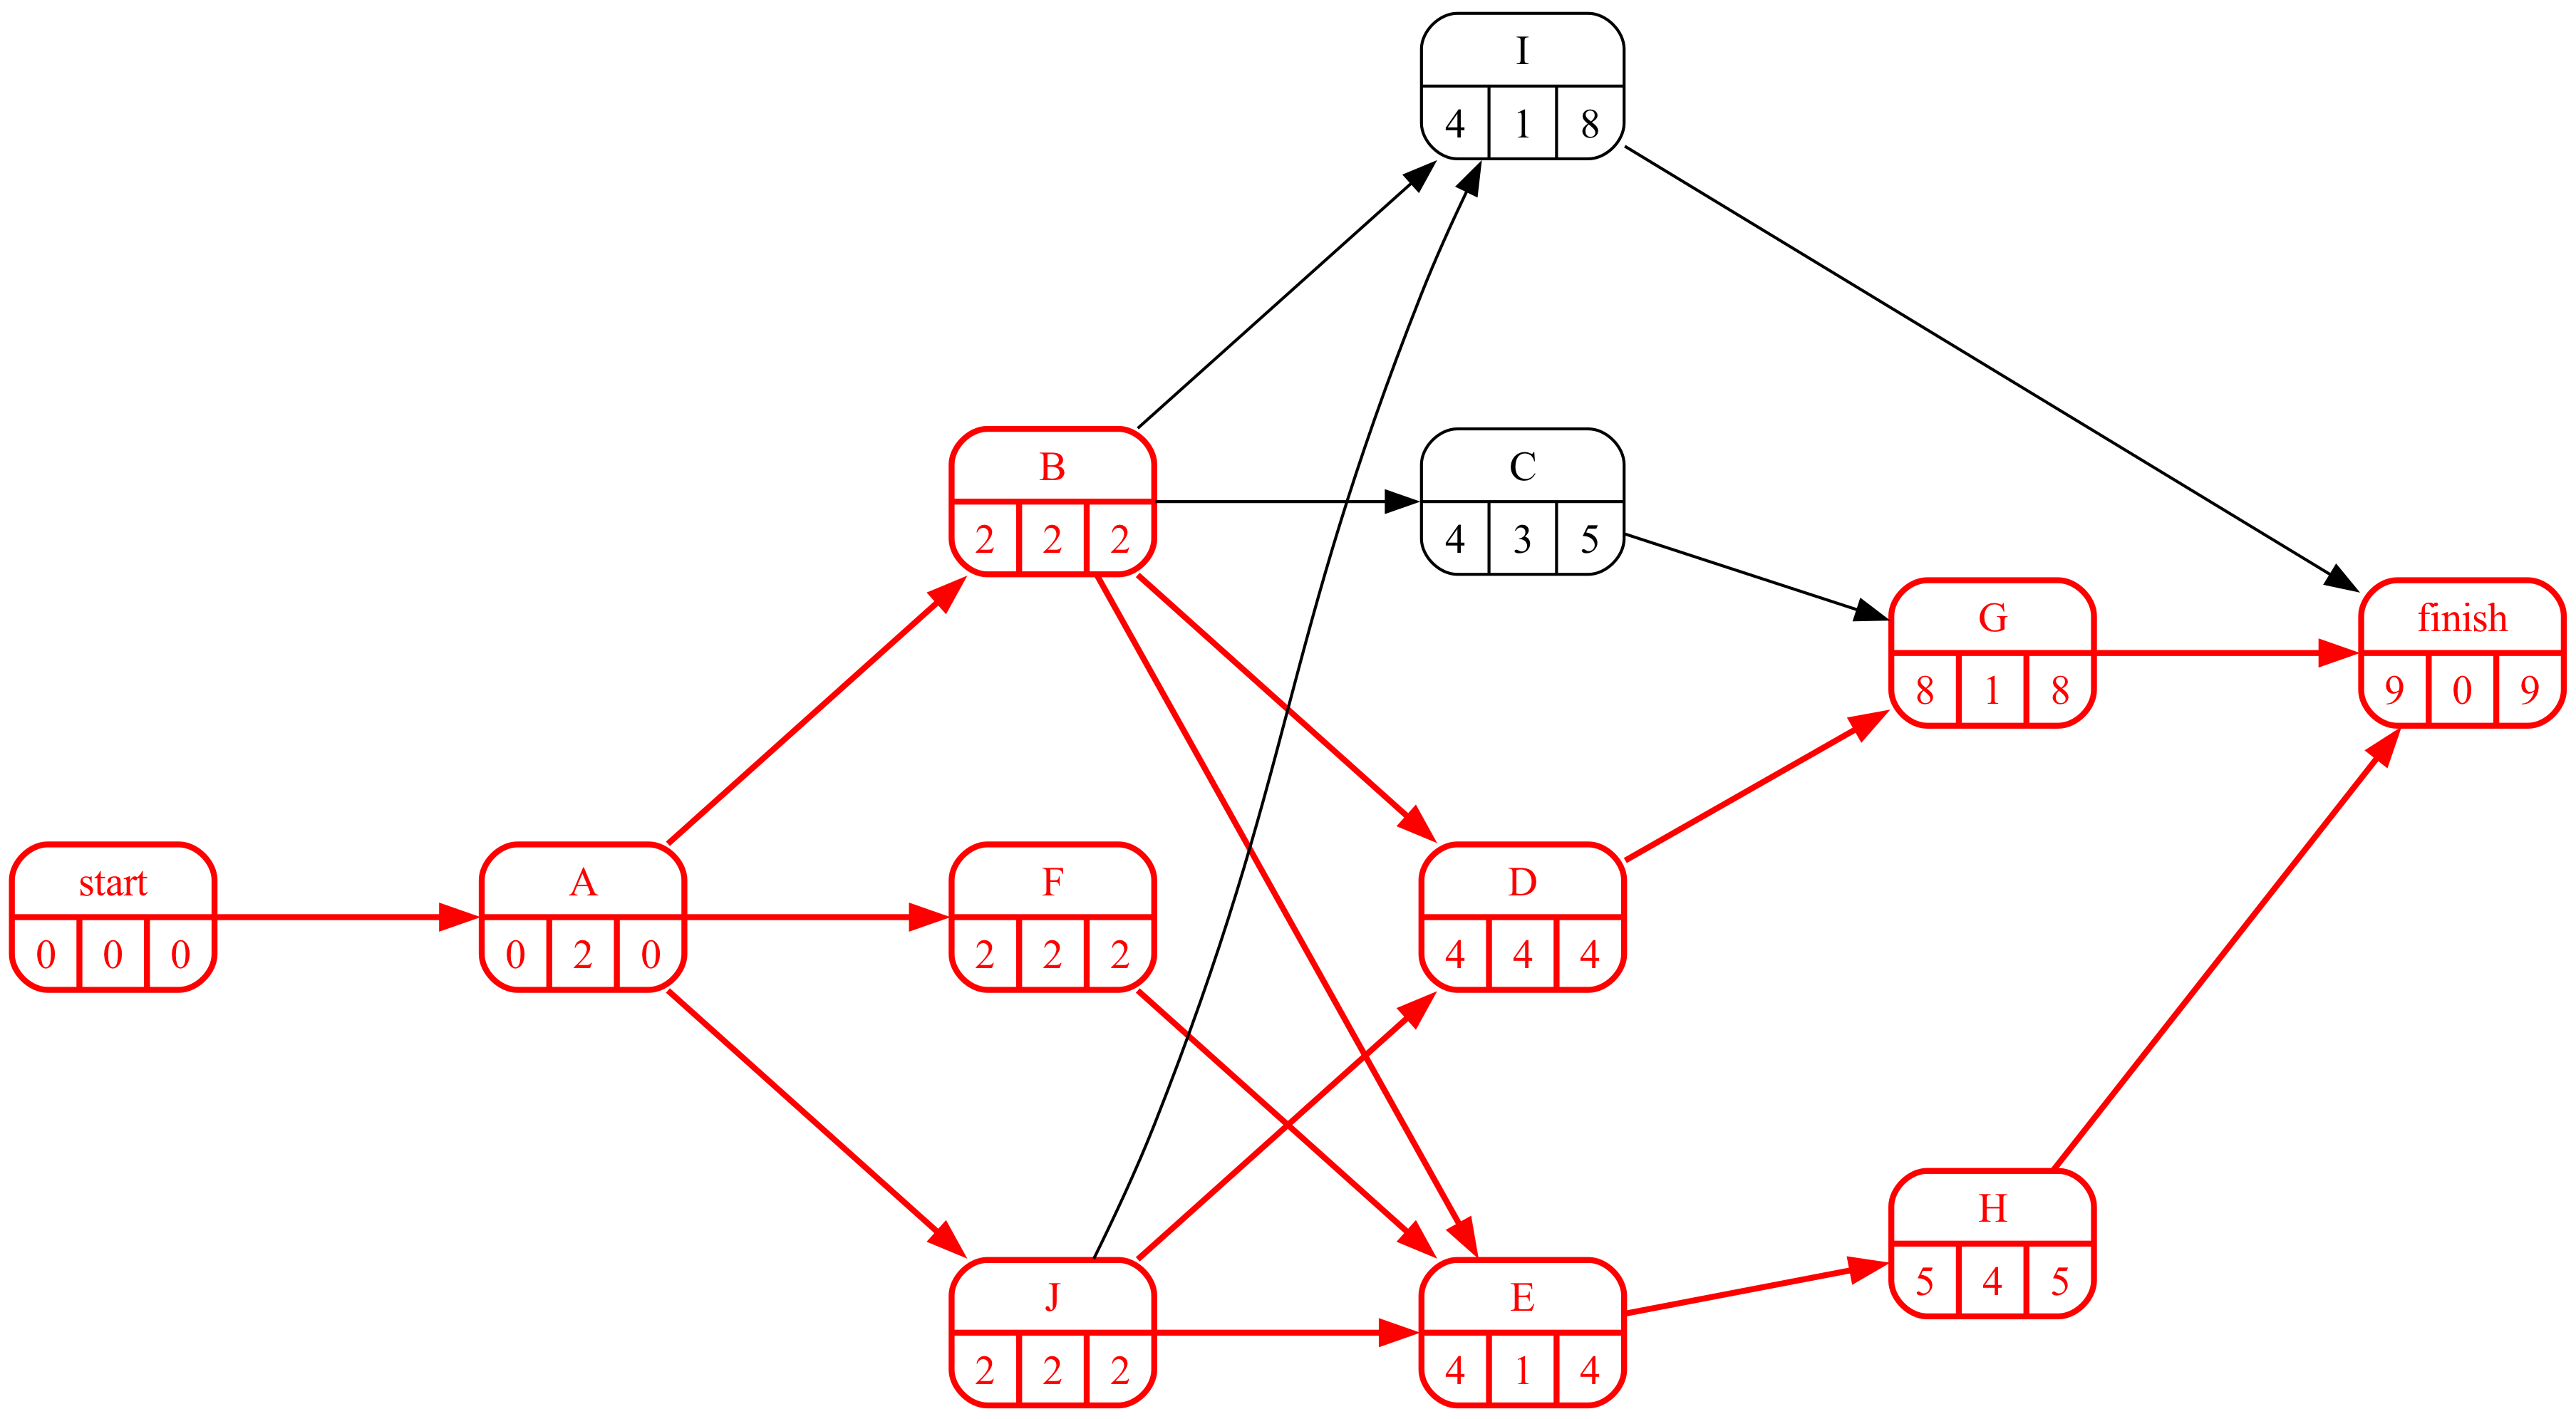

In [21]:
#| fig-cap: "Grafo Roy del proyecto con indicación de las actividades críticas"
#| label: fig-RoyCríticas
proyecto.roy(ranksep=1.25, nodesep=1.25, durations=datos_proyecto['duration'])

### Varianza del proyecto

Para determinar la varianza del proyecto es necesario conocer la varianza de cada una de las rutas del camino crítico, y para ello la varianza de las actividades que las componen.
La varianza de cada actividad no es aportada por el enunciado como dato, pero sí se puede calcular a partir de la expresión $\sigma^2 = \left(\frac{b-a}{6} \right)$

In [22]:
#| tbl-cap: "Cálculo de la varianza de la duración de las actividades"
#| label: tbl-varianzas
datos_proyecto['variance'] = (((datos_proyecto['pesimistic_duration'] - datos_proyecto['optimistic_duration'])/6)**2).round(2)
datos_proyecto[['pesimistic_duration', 'optimistic_duration', 'variance']]

,pesimistic_duration,optimistic_duration,variance
activity,,,
A,2,2.0,0.00
B,3,1.0,0.11
C,4,2.0,0.11
D,5,2.0,0.25
E,1,1.0,0.00
F,3,1.0,0.11
G,1,1.0,0.00
H,5,3.0,0.11
I,1,1.0,0.00


Conocidos estos valores podemos calcular, mediante el teorema del límite central, la varianza de cada ruta como suma de las varianzas de sus actividades.

In [23]:
desviacion_proyecto, varianza_caminos = proyecto.standard_deviation(durations = datos_proyecto['duration'],
                                                  variances = datos_proyecto['variance'])

In [24]:
#| tbl-cap: "Varianza de las rutas del camino crítico"
#| label: tbl-varianzaRutas
varianza_caminos

,Activities,Variance
Route_2,"A, B, D, G",0.36
Route_3,"A, B, E, H",0.22
Route_5,"A, E, F, H",0.22
Route_6,"A, D, G, J",0.25
Route_7,"A, E, H, J",0.11


In [25]:
display(Markdown(f"""La varianza de la duración del proyecto es la máxima varianza de las rutas críticas. Para este proyecto es {round(desviacion_proyecto**2,2)}.  
Habitualmente será útil calcular su raiz cuadrada, la desviación típica, para ser utilizada como parámetro de la ley de distribución normal.  """))
display(Markdown(f"La desviación típica es {desviacion_proyecto}"""))

La varianza de la duración del proyecto es la máxima varianza de las rutas críticas. Para este proyecto es 0.36.  
Habitualmente será útil calcular su raiz cuadrada, la desviación típica, para ser utilizada como parámetro de la ley de distribución normal.  

La desviación típica es 0.6

## Apartado 3

In [26]:
display(Markdown(pregunta_3))

3. Determine la probabilidad de que el proyecto se termine antes de 10 periodos.  

In [27]:
import scipy
from scipy.stats import norm

probabilidad_de_terminar_antes_de_tau = norm.cdf(periodo_probabilidad_tau, loc=duracion_media_proyecto, scale=desviacion_proyecto)
Markdown(f"Para un proyecto con duración media {duracion_media_proyecto} y desviación típica {round(desviacion_proyecto, 2)} el valor de la probabilidad de terminar antes de {periodo_probabilidad_tau} periodos es {round(probabilidad_de_terminar_antes_de_tau * 100, 2)} por ciento.")

Para un proyecto con duración media 9 y desviación típica 0.6 el valor de la probabilidad de terminar antes de 10 periodos es 95.22 por ciento.

## Apartado 4

In [28]:
display(Markdown(pregunta_4))

4. Planifique el proyecto teniendo en cuenta que durante las primeras tres semanas dispondrá de cuatro trabajadores y a partir de la cuarta de seis trabajadores.  

### Análisis de la situación inicial

Para responder este apartado es necesario representar la demanda de recursos a lo largo del tiempo.

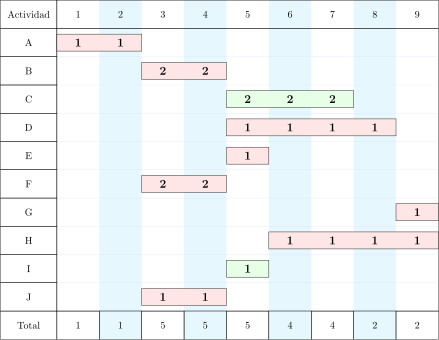

In [29]:
#| fig-cap: "Distribución inicial del consumo de recursos"
#| label: fig-recursosInicial
datos_proyecto[['duration',
                'pesimistic_duration',
                'resources',
                'optimistic_duration']] = datos_proyecto[['duration', 'pesimistic_duration', 
                                                            'resources', 'optimistic_duration']].astype(int)
proyecto_asignacion = proyecto.copy()
gantt_df, dibujo = proyecto.gantt(datos_proyecto,
                      duration_label='duration',
                      resource_label='resources',
                      total='fila',
                      tikz=True,
                      params=dict(
                        period_width=1.5,
                        row_height=1,
                        #background_horizontal_line_color='gray',
                        #background_vertical_bars_color='white!92!cyan',
                        activity_relative_height=0.6,
                        critical_background_color='white!90!red',
                        regular_background_color='white!90!green',
                        regular_text_color='black',
                        critical_text_color='black',
                        activity_inner_text_style=r"\bfseries\large",),
                    )
pinta_tikz(dibujo)

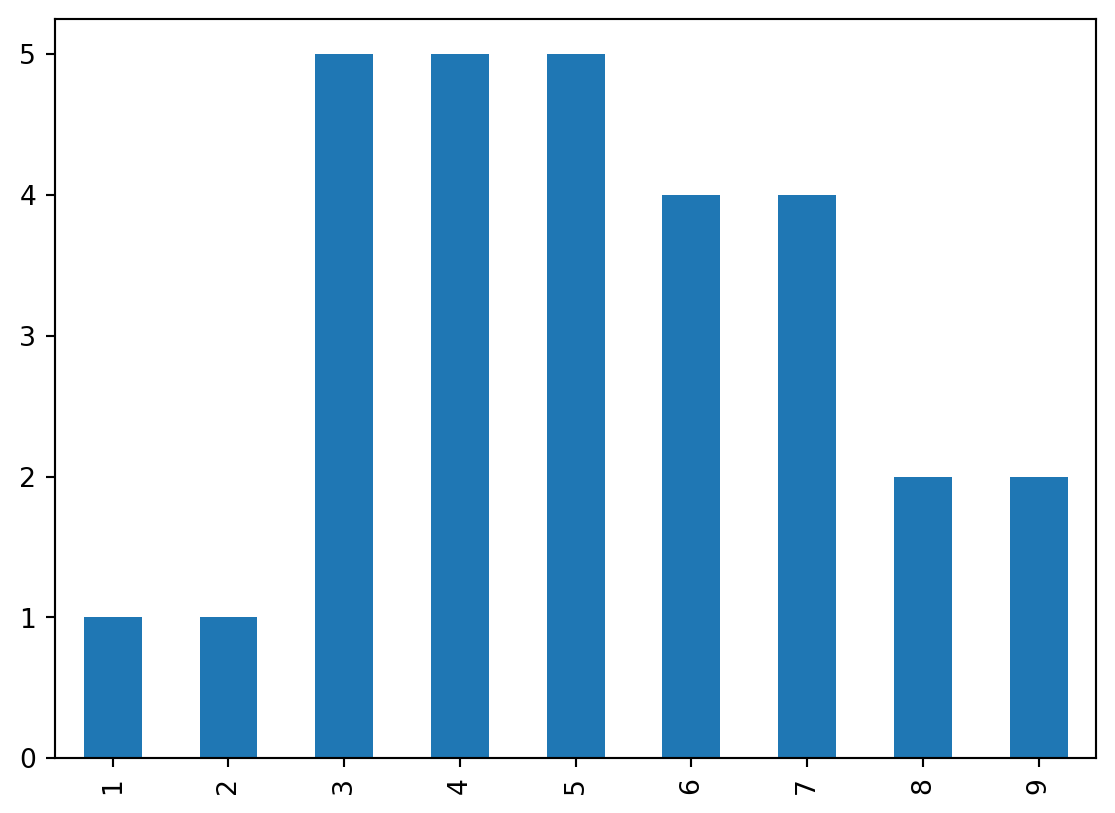

In [30]:
#| label: fig-barras-recursos
#| fig-cap: "Consumo de recursos en los distintos periodos"
gantt_df.data.loc['Total'].plot(kind='bar');

La demanda de recursos actual infringe el límite impuesto en el enunciado. Es necesario aplicar el algoritmo de asignación. Representamos a continuación la nueva planificación atendiendo a los cambios introducidos de acuerdo al algoritmo de asignación.

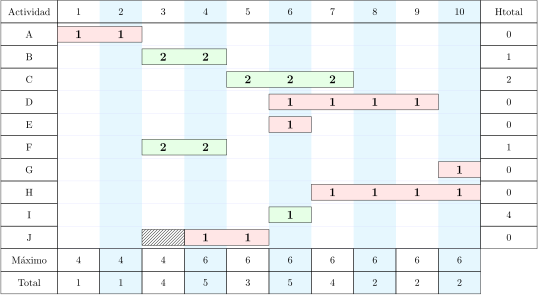

In [31]:
#| fig-cap: "Planificación del proyecto tras aplicar el algoritmo de asignación"
#| label: fig-asignacion46
proyecto_asignacion = proyecto.copy()
gantt_df, dibujo = proyecto_asignacion.asignar(data=datos_proyecto,
                                              duration_label='duration',
                                              resource_label='resources',
                                              maximo = [4,4,4,6],
                                              report = False,
                                              params = dict(
                                                  period_width=1.5
                                                  )
                                              )
pinta_tikz(dibujo)

La zona sombreada indica el desplazamiento realizado en las actividades. De acuerdo a los cambios introducidos el proyecto ya es compatible con las restricciones impuestas a los recursos.

## Apartado 5

In [32]:
display(Markdown(pregunta_5))

5. ¿Sería suficiente disponer de 4 recursos durante todo el proyecto? ¿Por qué?  

Se analiza ahora la posibilidad de reprogramar el proyecto atendiendo al criterio de que el consumo de recursos no supere el  límite de 4 recursos a lo largo de todo el proyecto impuesto por el enunciado del ejercicio. El siguiente diagrama de Gantt muestra la nueva planificación obtenida al aplicar el algoritmo de asignación con el límite impuesto.

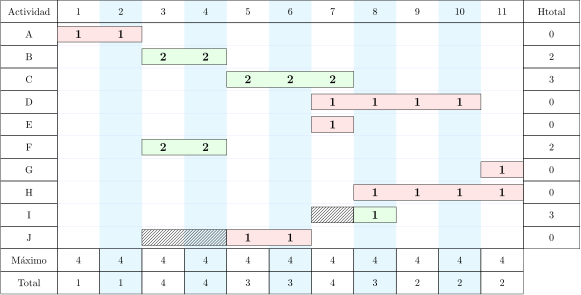

In [33]:
#| fig-cap: "Planificación del proyecto tras aplicar el algoritmo de asignación con el nuevo límite"
#| label: fig-asignacion444
proyecto_asignacion = proyecto.copy()
gantt_df, dibujo = proyecto_asignacion.asignar(data=datos_proyecto,
                                              duration_label='duration',
                                              resource_label='resources',
                                              maximo = [4,4,4],
                                              report = False,
                                              params = dict(
                                                  period_width=1.5
                                                  )
                                              )
pinta_tikz(dibujo)

En estas condiciones el proyecto ya es viable con 4 recursos. No obstante su duración se ha prolongado hasta 11 periodos.